# Objective: create best teams with medalists: re-run metaheuristcs on 6 individual medalists

In [33]:
import pandas as pd
import numpy as np

In [34]:
iaa24 = pd.read_csv('../Combine_Data/women/iaa2024.csv')
usa = iaa24[iaa24['Nation'] == 'USA']

In [35]:
df1 = pd.read_csv('../Cleaning/USOPC/usa_women_apparatus.csv')


In [36]:
df = df1.groupby('Name').sum().reset_index()

In [37]:
data = {
    'Method': ['Variable Neighborhood Search (VNS)', 'Variable Neighborhood Search (VNS)', 'Randomized Heuristic ', 'Randomized Heuristic ', 'Tabu Search', 'Tabu Search', 'brute force', 'brute force', 'Stochastic control', 'Stochastic control'],
    'IAA/Apparatus': ['IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus'],
    'Selected Athletes': [['shilese jones', 'simone biles', 'jordan chiles', 'jade carey'], ['shilese jones', 'simone biles', 'jade carey', 'kayla dicello'], ['skye blakely', 'jade carey', 'shilese jones', 'simone biles'], ['simone biles', 'kaylen morgan', 'jordan chiles', 'shilese jones'], ['jade carey', 'jordan chiles', 'shilese jones', 'simone biles'], ['konnor mcclain', 'jade carey', 'simone biles', 'shilese jones'], ['jade carey', 'jordan chiles', 'shilese jones', 'simone biles'], ['addison fatta', 'jade carey', 'shilese jones', 'simone biles'], ['jade carey', 'jordan chiles', 'joscelyn roberson', 'simone biles'], ['addison fatta', 'annalisa milton', 'chloe cho', 'kelise woolford']],
    'Score': [171.47074999999998, 169.51021666666668, 169.963, 168.42235, 171.33725, 170.79811666666666, 169.96300000000002, 169.12011666666666, 156.9955, 141.70375]
}

In [38]:
df = pd.DataFrame(data)
df


,Method,IAA/Apparatus,Selected Athletes,Score
0,Variable Neighborhood Search (VNS),IAA,"[shilese jones, simone biles, jordan chiles, j...",171.470750
1,Variable Neighborhood Search (VNS),Apparatus,"[shilese jones, simone biles, jade carey, kayl...",169.510217
2,Randomized Heuristic,IAA,"[skye blakely, jade carey, shilese jones, simo...",169.963000
3,Randomized Heuristic,Apparatus,"[simone biles, kaylen morgan, jordan chiles, s...",168.422350
4,Tabu Search,IAA,"[jade carey, jordan chiles, shilese jones, sim...",171.337250
5,Tabu Search,Apparatus,"[konnor mcclain, jade carey, simone biles, shi...",170.798117
6,brute force,IAA,"[jade carey, jordan chiles, shilese jones, sim...",169.963000
7,brute force,Apparatus,"[addison fatta, jade carey, shilese jones, sim...",169.120117
8,Stochastic control,IAA,"[jade carey, jordan chiles, joscelyn roberson,...",156.995500
9,Stochastic control,Apparatus,"[addison fatta, annalisa milton, chloe cho, ke...",141.703750


In [39]:
# Extract unique athletes
athletes = list(set(athlete for athletes_list in df['Selected Athletes'] for athlete in athletes_list))

# Create columns for each athlete
for athlete in athletes:
    df[athlete] = df['Selected Athletes'].apply(lambda x: 1 if athlete in x else 0)

# Calculate the sum for each athlete column
athlete_sums = df.groupby('Method')[athletes].sum()

athlete_sums


,kelise woolford,shilese jones,konnor mcclain,kayla dicello,simone biles,annalisa milton,jordan chiles,skye blakely,joscelyn roberson,chloe cho,jade carey,addison fatta,kaylen morgan
Method,,,,,,,,,,,,,
Randomized Heuristic,0,2,0,0,2,0,1,1,0,0,1,0,1
Stochastic control,1,0,0,0,1,1,1,0,1,1,1,1,0
Tabu Search,0,2,1,0,2,0,1,0,0,0,2,0,0
Variable Neighborhood Search (VNS),0,2,0,1,2,0,1,0,0,0,2,0,0
brute force,0,2,0,0,2,0,1,0,0,0,2,1,0


In [40]:

sum_row = athlete_sums.sum(axis=0)

# Convert the sum row to a DataFrame
sum_df = pd.DataFrame([sum_row], columns=athlete_sums.columns)

# Concatenate the sum row with the original DataFrame
athlete_sums = pd.concat([athlete_sums, sum_df], ignore_index=False)

athlete_sums = athlete_sums.reset_index(drop=False)

In [41]:
athlete_sums

,index,kelise woolford,shilese jones,konnor mcclain,kayla dicello,simone biles,annalisa milton,jordan chiles,skye blakely,joscelyn roberson,chloe cho,jade carey,addison fatta,kaylen morgan
0,Randomized Heuristic,0,2,0,0,2,0,1,1,0,0,1,0,1
1,Stochastic control,1,0,0,0,1,1,1,0,1,1,1,1,0
2,Tabu Search,0,2,1,0,2,0,1,0,0,0,2,0,0
3,Variable Neighborhood Search (VNS),0,2,0,1,2,0,1,0,0,0,2,0,0
4,brute force,0,2,0,0,2,0,1,0,0,0,2,1,0
5,0,1,8,1,1,9,1,5,1,1,1,8,2,1


In [42]:
athlete_sums=athlete_sums.T

In [43]:
df=athlete_sums.copy()

In [44]:
df

,0,1,2,3,4,5
index,Randomized Heuristic,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,0
kelise woolford,0,1,0,0,0,1
shilese jones,2,0,2,2,2,8
konnor mcclain,0,0,1,0,0,1
kayla dicello,0,0,0,1,0,1
simone biles,2,1,2,2,2,9
annalisa milton,0,1,0,0,0,1
jordan chiles,1,1,1,1,1,5
skye blakely,1,0,0,0,0,1
joscelyn roberson,0,1,0,0,0,1


In [45]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=False)


In [46]:
df

index,index,Randomized Heuristic,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,0
0,kelise woolford,0,1,0,0,0,1
1,shilese jones,2,0,2,2,2,8
2,konnor mcclain,0,0,1,0,0,1
3,kayla dicello,0,0,0,1,0,1
4,simone biles,2,1,2,2,2,9
5,annalisa milton,0,1,0,0,0,1
6,jordan chiles,1,1,1,1,1,5
7,skye blakely,1,0,0,0,0,1
8,joscelyn roberson,0,1,0,0,0,1
9,chloe cho,0,1,0,0,0,1


In [47]:
df.columns

Index([                             'index',
                    'Randomized Heuristic ',
                       'Stochastic control',
                              'Tabu Search',
       'Variable Neighborhood Search (VNS)',
                              'brute force',
                                          0],
      dtype='object', name='index')

In [48]:

df = df.rename(columns={'index': 'Name', 0: 'sum'})

In [49]:
df

index,Name,Randomized Heuristic,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,sum
0,kelise woolford,0,1,0,0,0,1
1,shilese jones,2,0,2,2,2,8
2,konnor mcclain,0,0,1,0,0,1
3,kayla dicello,0,0,0,1,0,1
4,simone biles,2,1,2,2,2,9
5,annalisa milton,0,1,0,0,0,1
6,jordan chiles,1,1,1,1,1,5
7,skye blakely,1,0,0,0,0,1
8,joscelyn roberson,0,1,0,0,0,1
9,chloe cho,0,1,0,0,0,1


In [50]:
df = df.sort_values(by='sum', ascending=False)

In [51]:
df

index,Name,Randomized Heuristic,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,sum
4,simone biles,2,1,2,2,2,9
1,shilese jones,2,0,2,2,2,8
10,jade carey,1,1,2,2,2,8
6,jordan chiles,1,1,1,1,1,5
11,addison fatta,0,1,0,0,1,2
0,kelise woolford,0,1,0,0,0,1
2,konnor mcclain,0,0,1,0,0,1
3,kayla dicello,0,0,0,1,0,1
5,annalisa milton,0,1,0,0,0,1
7,skye blakely,1,0,0,0,0,1


In [52]:
df=df.drop(columns=['Randomized Heuristic', 'Stochastic control', 'Tabu Search',
                   'Variable Neighborhood Search (VNS)', 'brute force'])

KeyError: "['Randomized Heuristic'] not found in axis"

In [53]:
df

index,Name,Randomized Heuristic,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,sum
4,simone biles,2,1,2,2,2,9
1,shilese jones,2,0,2,2,2,8
10,jade carey,1,1,2,2,2,8
6,jordan chiles,1,1,1,1,1,5
11,addison fatta,0,1,0,0,1,2
0,kelise woolford,0,1,0,0,0,1
2,konnor mcclain,0,0,1,0,0,1
3,kayla dicello,0,0,0,1,0,1
5,annalisa milton,0,1,0,0,0,1
7,skye blakely,1,0,0,0,0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 12
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                13 non-null     object
 1   Randomized Heuristic                13 non-null     object
 2   Stochastic control                  13 non-null     object
 3   Tabu Search                         13 non-null     object
 4   Variable Neighborhood Search (VNS)  13 non-null     object
 5   brute force                         13 non-null     object
 6   sum                                 13 non-null     object
dtypes: object(7)
memory usage: 832.0+ bytes


In [55]:
df['Name'].unique()

array(['simone biles', 'shilese jones', 'jade carey', 'jordan chiles',
       'addison fatta', 'kelise woolford', 'konnor mcclain',
       'kayla dicello', 'annalisa milton', 'skye blakely',
       'joscelyn roberson', 'chloe cho', 'kaylen morgan'], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 12
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                13 non-null     object
 1   Randomized Heuristic                13 non-null     object
 2   Stochastic control                  13 non-null     object
 3   Tabu Search                         13 non-null     object
 4   Variable Neighborhood Search (VNS)  13 non-null     object
 5   brute force                         13 non-null     object
 6   sum                                 13 non-null     object
dtypes: object(7)
memory usage: 832.0+ bytes


In [57]:
iaa24

,Rank,Athlete,Nation,VT,UB,BB,FX,AA,round,year
0,1,rebeca andrade,BRA,15.066,14.666,13.400,14.200,57.332,qual,2022
1,2,shilese jones,USA,14.200,14.566,13.200,13.800,55.766,qual,2022
2,3,jade carey,USA,14.600,13.333,13.133,14.066,55.132,qual,2022
3,4,martina maggio,ITA,14.200,14.200,12.900,13.500,54.800,qual,2022
4,5,jessica gadirova,none,14.400,13.166,12.933,14.100,54.599,qual,2022
...,...,...,...,...,...,...,...,...,...,...
816,29,gabriella van frayen,none,12.950,0.000,11.300,12.100,36.350,final,2023
817,30,myli lew,none,12.950,13.650,0.000,0.000,26.600,final,2023
818,31,skye blakely,none,0.000,13.150,13.400,0.000,26.500,final,2023
819,32,tiana sumanasekera,none,0.000,12.900,12.600,0.000,25.500,final,2023


In [58]:
usa=iaa24.drop(columns=['round', 'year', 'Nation', 'Rank', 'AA'])

In [59]:
iaa = usa.groupby('Athlete').mean().reset_index()

In [60]:
# medalist
selected_athletes =['ashlee sullivan', 'simone biles', 'joscelyn roberson',
       'shilese jones', 'zoe miller', 'jordan chiles']

# Create a new DataFrame with selected athletes
iaa = iaa[iaa['Athlete'].isin(selected_athletes)]

iaa

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [257]:
iaa['Athlete'].value_counts()

Athlete
ashlee sullivan      1
jordan chiles        1
joscelyn roberson    1
shilese jones        1
simone biles         1
zoe miller           1
Name: count, dtype: int64

In [261]:
df1

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [262]:
df1 = pd.read_csv('../Cleaning/USOPC/usa_women_apparatus.csv')


In [263]:
app = df1.groupby('Name').sum().reset_index()

In [264]:
# medalist
selected_athletes = ['ashlee sullivan', 'simone biles', 'joscelyn roberson',
       'shilese jones', 'zoe miller', 'jordan chiles']

# Create a new DataFrame with selected athletes
app = app[app['Name'].isin(selected_athletes)]



In [265]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 6 to 55
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   BB      6 non-null      float64
 2   FX      6 non-null      float64
 3   UB      6 non-null      float64
 4   VT      6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


In [266]:
iaa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 53 to 402
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Athlete  6 non-null      object 
 1   VT       6 non-null      float64
 2   UB       6 non-null      float64
 3   BB       6 non-null      float64
 4   FX       6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13 non-null     object
 1   sum     13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [268]:
# Updated data without brute-force search
new_data = {
    'Individual_Medal':['ashlee sullivan', 'simone biles','joscelyn roberson',
         'shilese jones', 'zoe miller', 'jordan chiles']}

# Create DataFrame
medal = pd.DataFrame(new_data)




In [269]:
medal['Individual_Medal'].unique()

array(['ashlee sullivan', 'simone biles', 'joscelyn roberson',
       'shilese jones', 'zoe miller', 'jordan chiles'], dtype=object)

In [270]:
df1=iaa.copy()

In [271]:
df2=app.copy()

# VNS

## IAA
Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


## app

Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002


# Randomized Heuristic 

### IAA
Best Selection: ['jordan chiles' 'simone biles' 'shilese jones' 'zoe miller']
Best Score: 168.829


## APP

Best Selection: ['shilese jones' 'jordan chiles' 'joscelyn roberson' 'simone biles']
Best Score: 168.42235

# Tabu Search
## IAA

Selected Athletes:
['simone biles' 'jordan chiles' 'shilese jones' 'ashlee sullivan']
Total Score:
170.81300000000002

## App

Selected Athletes:
['joscelyn roberson' 'zoe miller' 'simone biles' 'shilese jones']
Total Score:
169.71908928571426

# brute force

## IAA

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829

## App
Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235


---

# VNS

## IAA
Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


## app

Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002

# IAA
Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


In [207]:
import pandas as pd
import numpy as np

df=df1.copy()
# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'UB', 'BB', 'VT']

# Define the neighborhood size
neighborhood_size = 2  # Adjust as needed

# Initialize the solution randomly
selected_athletes = np.random.choice(df['Athlete'], num_athletes_to_select, replace=False)

# Define a function to calculate the total score for a given solution
def calculate_total_score(selected_athletes):
    selected_scores = df[df['Athlete'].isin(selected_athletes)][apparatuses].values
    top_3_scores = np.sum(np.partition(selected_scores, -3)[:, -3:])
    return top_3_scores

# Define the main VNS algorithm
def variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations):
    best_solution = None
    best_score = float('-inf')

    for iteration in range(num_iterations):
        # Shake: Generate a new solution by randomly changing athletes
        current_solution = np.random.choice(df['Athlete'], num_athletes_to_select, replace=False)
        
        for _ in range(neighborhood_size):
            # Local Search: Optimize the solution locally
            current_score = calculate_total_score(current_solution)
            
            # Perturb: Randomly change some athletes in the current solution
            perturbed_solution = np.random.choice(df['Athlete'], num_athletes_to_select, replace=False)
            perturbed_score = calculate_total_score(perturbed_solution)
            
            # Acceptance Criterion: Accept the perturbed solution if it improves the score
            if perturbed_score > current_score:
                current_solution = perturbed_solution
                current_score = perturbed_score

        # Update the best solution if the current one is better
        if current_score > best_score:
            best_solution = current_solution
            best_score = current_score

    return best_solution, best_score

# Run the VNS algorithm
best_solution, best_score = variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations=1000)

# Print the result
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)


Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


# app

Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002

In [209]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

df=df2.copy()
np.random.seed(42)

# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'UB', 'BB', 'VT']

# Define the neighborhood size
neighborhood_size = 2  # Adjust as needed

# Initialize the solution randomly
selected_athletes = np.random.choice(df['Name'], num_athletes_to_select, replace=False)

# Define a function to calculate the total score for a given solution
def calculate_total_score(selected_athletes):
    selected_scores = df[df['Name'].isin(selected_athletes)][apparatuses].values
    top_3_scores = np.sum(np.partition(selected_scores, -3)[:, -3:])
    return top_3_scores

# Define the main VNS algorithm
def variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations):
    best_solution = None
    best_score = float('-inf')

    for iteration in range(num_iterations):
        # Shake: Generate a new solution by randomly changing athletes
        current_solution = np.random.choice(df['Name'], num_athletes_to_select, replace=False)
        
        for _ in range(neighborhood_size):
            # Local Search: Optimize the solution locally
            current_score = calculate_total_score(current_solution)
            
            # Perturb: Randomly change some athletes in the current solution
            perturbed_solution = np.random.choice(df['Name'], num_athletes_to_select, replace=False)
            perturbed_score = calculate_total_score(perturbed_solution)
            
            # Acceptance Criterion: Accept the perturbed solution if it improves the score
            if perturbed_score > current_score:
                current_solution = perturbed_solution
                current_score = perturbed_score

        # Update the best solution if the current one is better
        if current_score > best_score:
            best_solution = current_solution
            best_score = current_score

    return best_solution, best_score

# Run the VNS algorithm
best_solution, best_score = variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations=1000)

# Print the result
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)

# Additional code for iterating through seed values
num_iterations_seed = 100

# Initialize variables to store the best result
best_solution_seed = None
best_score_seed = float('-inf')
best_seed = None

for seed in tqdm(range(num_iterations_seed), desc="Running VNS with Different Seeds"):
    np.random.seed(seed)

    # Run the VNS algorithm
    current_solution_seed, current_score_seed = variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations=1000)

    # Update the best result if the current one is better
    if current_score_seed > best_score_seed:
        best_solution_seed = current_solution_seed
        best_score_seed = current_score_seed
        best_seed = seed

# Print the best result
print('Best Seed:', best_seed)
print('Selected Athletes (Best Seed):')
print(best_solution_seed)
print('Total Score (Best Seed):')
print(best_score_seed)


Selected Athletes:
['jordan chiles' 'simone biles' 'joscelyn roberson' 'shilese jones']
Total Score:
168.99812500000002


Running VNS with Different Seeds: 100%|███████| 100/100 [04:54<00:00,  2.94s/it]

Best Seed: 0
Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002


# Randomized Heuristic

### IAA
Best Selection: ['jordan chiles' 'simone biles' 'shilese jones' 'zoe miller']
Best Score: 168.829


## APP

Best Selection: ['shilese jones' 'jordan chiles' 'joscelyn roberson' 'simone biles']
Best Score: 168.42235


## IAA

In [210]:
import pandas as pd
import numpy as np

df=df1.copy()

# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'VT', 'BB', 'UB']

# Initialize variables to store the best solution
best_score = 0
best_selection = None

# Define the number of iterations for theRandomized Heuristic 
num_iterations = 1000

for _ in range(num_iterations):
    # Randomly select 4 athletes
    selected_athletes = np.random.choice(df['Athlete'], size=num_athletes_to_select, replace=False)

    # Calculate the score for the current selection
    scores = df[df['Athlete'].isin(selected_athletes)][apparatuses].sum(axis=1).nlargest(3).sum()

    # Update the best solution if the current one is better
    if scores > best_score:
        best_score = scores
        best_selection = selected_athletes

# Print the best selection and score
print("Best Selection:", best_selection)
print("Best Score:", best_score)


Best Selection: ['jordan chiles' 'simone biles' 'shilese jones' 'zoe miller']
Best Score: 168.829


## App

In [211]:
import pandas as pd
import numpy as np

df=df2.copy()
# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'VT', 'BB', 'UB']

# Initialize variables to store the best solution
best_score = 0
best_selection = None

# Define the number of iterations for the Randomized Heuristic 
num_iterations = 1000

for _ in range(num_iterations):
    # Randomly select 4 athletes
    selected_athletes = np.random.choice(df['Name'], size=num_athletes_to_select, replace=False)

    # Calculate the score for the current selection
    scores = df[df['Name'].isin(selected_athletes)][apparatuses].sum(axis=1).nlargest(3).sum()

    # Update the best solution if the current one is better
    if scores > best_score:
        best_score = scores
        best_selection = selected_athletes

# Print the best selection and score
print("Best Selection:", best_selection)
print("Best Score:", best_score)


Best Selection: ['shilese jones' 'jordan chiles' 'joscelyn roberson' 'simone biles']
Best Score: 168.42235


# Tabu Search
## IAA

Selected Athletes:
['simone biles' 'jordan chiles' 'shilese jones' 'ashlee sullivan']
Total Score:
170.81300000000002

## App

Selected Athletes:
['joscelyn roberson' 'zoe miller' 'simone biles' 'shilese jones']
Total Score:
169.71908928571426



## IAA

Selected Athletes:
['simone biles' 'jordan chiles' 'shilese jones' 'ashlee sullivan']
Total Score:
170.81300000000002



In [212]:
import pandas as pd
import numpy as np

df= df1.copy()
def calculate_score(selected_athletes, df):
    """
    Calculate the total score for a given set of selected athletes.
    """
    # Select rows corresponding to the chosen athletes
    selected_df = df[df['Athlete'].isin(selected_athletes)]

    # Calculate the sum of the top 3 scores for each apparatus
    apparatus_scores = selected_df.drop(['Athlete'], axis=1)
    top_3_sum = apparatus_scores.apply(lambda row: sum(sorted(row, reverse=True)[:3]), axis=0)

    # Calculate the total score
    total_score = top_3_sum.sum()

    return total_score




def tabu_search(df, num_athletes_to_select, tabu_size, max_iterations):
    # Initialize the solution with a random set of athletes
    available_athletes = df['Athlete'].tolist()
    current_solution = np.random.choice(available_athletes, size=num_athletes_to_select, replace=False)
    best_solution = current_solution.copy()
    best_score = calculate_score(best_solution, df)

    # Initialize tabu list
    tabu_list = []

    # Main Tabu Search loop
    for iteration in range(max_iterations):
        # Generate neighbors by swapping athletes
        neighbors = []
        for i in range(num_athletes_to_select):
            for athlete in df['Athlete']:
                if athlete not in current_solution:
                    neighbor = current_solution.copy()
                    neighbor[i] = athlete
                    neighbors.append(neighbor)

                    
                    
                best_neighbor = None
        best_neighbor_score = float('-inf')

        for neighbor in neighbors:
            neighbor_score = calculate_score(neighbor, df)

            # Convert the NumPy array to a tuple
            neighbor_tuple = tuple(neighbor)

            if neighbor_score > best_neighbor_score and neighbor_tuple not in tabu_list:
                best_neighbor = neighbor
                best_neighbor_score = neighbor_score

        # Update current solution and tabu list
        current_solution = best_neighbor
        tabu_list.append(tuple(best_neighbor))

        # Keep the tabu list size within the specified limit
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        # Update the best solution if a better one is found
        if best_neighbor_score > best_score:
            best_solution = best_neighbor
            best_score = best_neighbor_score

        # Print progress
        print(f"Iteration {iteration + 1}, Best Score: {best_score}")

    return best_solution, best_score



# Set parameters
num_athletes_to_select = 4
tabu_size = 10
max_iterations = 100

# Perform Tabu Search
best_solution, best_score = tabu_search(df, num_athletes_to_select, tabu_size, max_iterations)

# Print the selected athletes and the corresponding score
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)

      

Iteration 1, Best Score: 170.81300000000002
Iteration 2, Best Score: 170.81300000000002
Iteration 3, Best Score: 170.81300000000002
Iteration 4, Best Score: 170.81300000000002
Iteration 5, Best Score: 170.81300000000002
Iteration 6, Best Score: 170.81300000000002
Iteration 7, Best Score: 170.81300000000002
Iteration 8, Best Score: 170.81300000000002
Iteration 9, Best Score: 170.81300000000002
Iteration 10, Best Score: 170.81300000000002
Iteration 11, Best Score: 170.81300000000002
Iteration 12, Best Score: 170.81300000000002
Iteration 13, Best Score: 170.81300000000002
Iteration 14, Best Score: 170.81300000000002
Iteration 15, Best Score: 170.81300000000002
Iteration 16, Best Score: 170.81300000000002
Iteration 17, Best Score: 170.81300000000002
Iteration 18, Best Score: 170.81300000000002
Iteration 19, Best Score: 170.81300000000002
Iteration 20, Best Score: 170.81300000000002
Iteration 21, Best Score: 170.81300000000002
Iteration 22, Best Score: 170.81300000000002
Iteration 23, Best 

## App

Selected Athletes:
['joscelyn roberson' 'zoe miller' 'simone biles' 'shilese jones']
Total Score:
169.71908928571426

In [213]:
import pandas as pd
import numpy as np

df=df2.copy()

def calculate_score(selected_athletes, df):
    """
    Calculate the total score for a given set of selected athletes.
    """
    # Select rows corresponding to the chosen athletes
    selected_df = df[df['Name'].isin(selected_athletes)]

    # Calculate the sum of the top 3 scores for each apparatus
    apparatus_scores = selected_df.drop(['Name'], axis=1)
    top_3_sum = apparatus_scores.apply(lambda row: sum(sorted(row, reverse=True)[:3]), axis=0)

    # Calculate the total score
    total_score = top_3_sum.sum()

    return total_score




def tabu_search(df, num_athletes_to_select, tabu_size, max_iterations):
    # Initialize the solution with a random set of athletes
    available_athletes = df['Name'].tolist()
    current_solution = np.random.choice(available_athletes, size=num_athletes_to_select, replace=False)
    best_solution = current_solution.copy()
    best_score = calculate_score(best_solution, df)

    # Initialize tabu list
    tabu_list = []

    # Main Tabu Search loop
    for iteration in range(max_iterations):
        # Generate neighbors by swapping athletes
        neighbors = []
        for i in range(num_athletes_to_select):
            for athlete in df['Name']:
                if athlete not in current_solution:
                    neighbor = current_solution.copy()
                    neighbor[i] = athlete
                    neighbors.append(neighbor)

                    
                    
                best_neighbor = None
        best_neighbor_score = float('-inf')

        for neighbor in neighbors:
            neighbor_score = calculate_score(neighbor, df)

            # Convert the NumPy array to a tuple
            neighbor_tuple = tuple(neighbor)

            if neighbor_score > best_neighbor_score and neighbor_tuple not in tabu_list:
                best_neighbor = neighbor
                best_neighbor_score = neighbor_score

        # Update current solution and tabu list
        current_solution = best_neighbor
        tabu_list.append(tuple(best_neighbor))

        # Keep the tabu list size within the specified limit
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        # Update the best solution if a better one is found
        if best_neighbor_score > best_score:
            best_solution = best_neighbor
            best_score = best_neighbor_score

        # Print progress
        print(f"Iteration {iteration + 1}, Best Score: {best_score}")

    return best_solution, best_score



# Set parameters
num_athletes_to_select = 4
tabu_size = 10
max_iterations = 100

# Perform Tabu Search
best_solution, best_score = tabu_search(df, num_athletes_to_select, tabu_size, max_iterations)

# Print the selected athletes and the corresponding score
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)

      

Iteration 1, Best Score: 167.70888928571426
Iteration 2, Best Score: 169.71908928571426
Iteration 3, Best Score: 169.71908928571426
Iteration 4, Best Score: 169.71908928571426
Iteration 5, Best Score: 169.71908928571426
Iteration 6, Best Score: 169.71908928571426
Iteration 7, Best Score: 169.71908928571426
Iteration 8, Best Score: 169.71908928571426
Iteration 9, Best Score: 169.71908928571426
Iteration 10, Best Score: 169.71908928571426
Iteration 11, Best Score: 169.71908928571426
Iteration 12, Best Score: 169.71908928571426
Iteration 13, Best Score: 169.71908928571426
Iteration 14, Best Score: 169.71908928571426
Iteration 15, Best Score: 169.71908928571426
Iteration 16, Best Score: 169.71908928571426
Iteration 17, Best Score: 169.71908928571426
Iteration 18, Best Score: 169.71908928571426
Iteration 19, Best Score: 169.71908928571426
Iteration 20, Best Score: 169.71908928571426
Iteration 21, Best Score: 169.71908928571426
Iteration 22, Best Score: 169.71908928571426
Iteration 23, Best 

# brute force

## IAA

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829

## App
Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235


## IAA

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829



In [214]:
import pandas as pd
import itertools
from tqdm import tqdm

df=df1.copy()
num_athletes = 4
apparatuses = ['VT', 'UB', 'BB', 'FX']

# Generate all combinations of athletes
athlete_combinations = list(itertools.combinations(df['Athlete'], num_athletes))

# variables to store maximum score and athletes
max_score = 0
selected_athletes = []

# tqdm progress bar
progress_bar = tqdm(total=len(athlete_combinations))

# Iterate through combination of athletes
for combination in athlete_combinations:
    # Generate all possible combinations of apparatuses for current athlete combination
    apparatus_combinations = list(itertools.permutations(apparatuses, num_athletes))

    # Iterate through each combination of apparatuses
    for apparatus_combination in apparatus_combinations:
        # Calculate the sum of top three scores for current apparatus combination
        score = df[df['Athlete'].isin(combination)][list(apparatus_combination)].sum(axis=1).nlargest(3).sum()

        # Update maximum score and selected athletes if a higher score is found
        if score > max_score:
            max_score = score
            selected_athletes = list(combination)

    # Update progress bar
    progress_bar.update(1)

progress_bar.close()

print('Selected Athletes:')
print(selected_athletes)
print('Maximum Score:')
print(max_score)


100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 22.95it/s]

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829


## App
Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235

In [215]:
import pandas as pd
import itertools
from tqdm import tqdm

df=df2.copy()

num_athletes = 4

apparatuses = ['VT', 'UB', 'BB', 'FX']

# Generate all combinations of athletes
athlete_combinations = list(itertools.combinations(df['Name'], num_athletes))

# variables to store maximum score and athletes
max_score = 0
selected_athletes = []

# tqdm progress bar
progress_bar = tqdm(total=len(athlete_combinations))

# Iterate through each combination of athletes
for combination in athlete_combinations:
    # Generate all combinations of apparatuses for current athlete combination
    apparatus_combinations = list(itertools.permutations(apparatuses, num_athletes))

    # Iterate through each combination of apparatuses
    for apparatus_combination in apparatus_combinations:
        # Calculate sum of top three scores for current apparatus combination
        score = df[df['Name'].isin(combination)][list(apparatus_combination)].sum(axis=1).nlargest(3).sum()

        # Update maximum score and selected athletes if a higher score is found
        if score > max_score:
            max_score = score
            selected_athletes = list(combination)

    progress_bar.update(1)

progress_bar.close()

print('Selected Athletes:')
print(selected_athletes)
print('Maximum Score:')
print(max_score)


100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 23.03it/s]

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235


In [61]:
import pandas as pd

data = {
    'Algorithm': ['VNS', 'VNS', 'Randomized Heuristic', 'Randomized Heuristic', 'Tabu Search', 'Tabu Search', 'brute force', 'brute force'],
    'Method': ['IAA', 'App', 'IAA', 'App', 'IAA', 'App', 'IAA', 'App'],
    'Athletes': [['jordan chiles', 'shilese jones', 'simone biles', 'ashlee sullivan'], 
                 ['shilese jones', 'jordan chiles', 'simone biles', 'joscelyn roberson'],
                 ['jordan chiles', 'simone biles', 'shilese jones', 'zoe miller'], 
                 ['shilese jones', 'jordan chiles', 'joscelyn roberson', 'simone biles'], 
                 ['simone biles', 'jordan chiles', 'shilese jones', 'ashlee sullivan'], 
                 ['joscelyn roberson', 'zoe miller', 'simone biles', 'shilese jones'], 
                 ['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles'], 
                 ['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']],
    'Score': [169.67175, 168.99812500000002, 168.829, 168.42235, 170.81300000000002,
                    169.71908928571426, 168.829, 168.42235],

}

df = pd.DataFrame(data)

In [62]:
df

,Algorithm,Method,Athletes,Score
0,VNS,IAA,"[jordan chiles, shilese jones, simone biles, a...",169.671750
1,VNS,App,"[shilese jones, jordan chiles, simone biles, j...",168.998125
2,Randomized Heuristic,IAA,"[jordan chiles, simone biles, shilese jones, z...",168.829000
3,Randomized Heuristic,App,"[shilese jones, jordan chiles, joscelyn robers...",168.422350
4,Tabu Search,IAA,"[simone biles, jordan chiles, shilese jones, a...",170.813000
5,Tabu Search,App,"[joscelyn roberson, zoe miller, simone biles, ...",169.719089
6,brute force,IAA,"[ashlee sullivan, jordan chiles, shilese jones...",168.829000
7,brute force,App,"[ashlee sullivan, jordan chiles, shilese jones...",168.422350


In [63]:
iaa

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [64]:
iaa['AA'] = iaa[['VT', 'UB', 'BB', 'FX']].sum(axis=1)

In [65]:
iaa

,Athlete,VT,UB,BB,FX,AA
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,52.800
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,53.998
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,42.833
343,shilese jones,14.224750,14.649500,13.62475,13.700000,56.199
346,simone biles,15.183000,14.366500,14.49950,14.583000,58.632
402,zoe miller,13.650000,13.500000,11.75000,12.525000,51.425


In [66]:
iaa = iaa.sort_values(by='AA', ascending=False)

In [67]:
iaa['AA'].unique()

array([58.632, 56.199, 53.998, 52.8  , 51.425, 42.833])

In [68]:
sum_values = 58.632 + 56.199 + 53.998
print(sum_values)

168.82899999999998


In [69]:
iaa

,Athlete,VT,UB,BB,FX,AA
346,simone biles,15.183000,14.366500,14.49950,14.583000,58.632
343,shilese jones,14.224750,14.649500,13.62475,13.700000,56.199
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,53.998
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,52.800
402,zoe miller,13.650000,13.500000,11.75000,12.525000,51.425
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,42.833


In [70]:
iaa['Athlete'].unique()

array(['simone biles', 'shilese jones', 'jordan chiles',
       'ashlee sullivan', 'zoe miller', 'joscelyn roberson'], dtype=object)

final athletes are:'simone biles', 'shilese jones', 'jordan chiles'

medalist still not on team: ashlee sullivan,joscelyn roberson, zoe miller

USA TEAM is: 'simone biles', 'shilese jones', 'jordan chiles', and 2 of the 3 following  ashlee sullivan,joscelyn roberson, zoe miller

In [71]:
iaa

,Athlete,VT,UB,BB,FX,AA
346,simone biles,15.183000,14.366500,14.49950,14.583000,58.632
343,shilese jones,14.224750,14.649500,13.62475,13.700000,56.199
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,53.998
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,52.800
402,zoe miller,13.650000,13.500000,11.75000,12.525000,51.425
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,42.833


In [72]:
iaa['AA'] = iaa.iloc[:, 1:].sum(axis=1)

In [73]:
iaa

,Athlete,VT,UB,BB,FX,AA
346,simone biles,15.183000,14.366500,14.49950,14.583000,117.264
343,shilese jones,14.224750,14.649500,13.62475,13.700000,112.398
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,107.996
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,105.600
402,zoe miller,13.650000,13.500000,11.75000,12.525000,102.850
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,85.666


In [74]:
58.632+56.199+53.998

168.82899999999998

'simone biles', 'shilese jones', 'jordan chiles = 168.82899

In [75]:
athletes_to_remove = ['simone biles', 'shilese jones', 'jordan chiles']

# Remove rows corresponding to specified athletes
iaa = iaa[~iaa['Athlete'].isin(athletes_to_remove)]



In [76]:
iaa

,Athlete,VT,UB,BB,FX,AA
53,ashlee sullivan,13.750000,12.600000,13.35,13.100000,105.600
402,zoe miller,13.650000,13.500000,11.75,12.525000,102.850
175,joscelyn roberson,13.788667,6.866667,8.90,13.277667,85.666


In [77]:
df

,Algorithm,Method,Athletes,Score
0,VNS,IAA,"[jordan chiles, shilese jones, simone biles, a...",169.671750
1,VNS,App,"[shilese jones, jordan chiles, simone biles, j...",168.998125
2,Randomized Heuristic,IAA,"[jordan chiles, simone biles, shilese jones, z...",168.829000
3,Randomized Heuristic,App,"[shilese jones, jordan chiles, joscelyn robers...",168.422350
4,Tabu Search,IAA,"[simone biles, jordan chiles, shilese jones, a...",170.813000
5,Tabu Search,App,"[joscelyn roberson, zoe miller, simone biles, ...",169.719089
6,brute force,IAA,"[ashlee sullivan, jordan chiles, shilese jones...",168.829000
7,brute force,App,"[ashlee sullivan, jordan chiles, shilese jones...",168.422350


In [78]:
df_exploded = df.explode('Athletes')

In [79]:
df_exploded['Athletes'].value_counts()

shilese jones        8
simone biles         8
jordan chiles        7
ashlee sullivan      4
joscelyn roberson    3
zoe miller           2
Name: Athletes, dtype: int64

In [80]:
df_exploded

,Algorithm,Method,Athletes,Score
0,VNS,IAA,jordan chiles,169.671750
0,VNS,IAA,shilese jones,169.671750
0,VNS,IAA,simone biles,169.671750
0,VNS,IAA,ashlee sullivan,169.671750
1,VNS,App,shilese jones,168.998125
1,VNS,App,jordan chiles,168.998125
1,VNS,App,simone biles,168.998125
1,VNS,App,joscelyn roberson,168.998125
2,Randomized Heuristic,IAA,jordan chiles,168.829000
2,Randomized Heuristic,IAA,simone biles,168.829000


In [81]:
df = df .drop(columns=['Athletes'])

In [82]:
df = df.sort_values(by='Score', ascending=False)
df

,Algorithm,Method,Score
4,Tabu Search,IAA,170.813000
5,Tabu Search,App,169.719089
0,VNS,IAA,169.671750
1,VNS,App,168.998125
2,Randomized Heuristic,IAA,168.829000
6,brute force,IAA,168.829000
3,Randomized Heuristic,App,168.422350
7,brute force,App,168.422350


In [87]:
# df.to_csv('women_algos.csv', index=False)

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_89922/4193572000.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Algorithm', y='Score', hue='Method', data=df, ci=None)


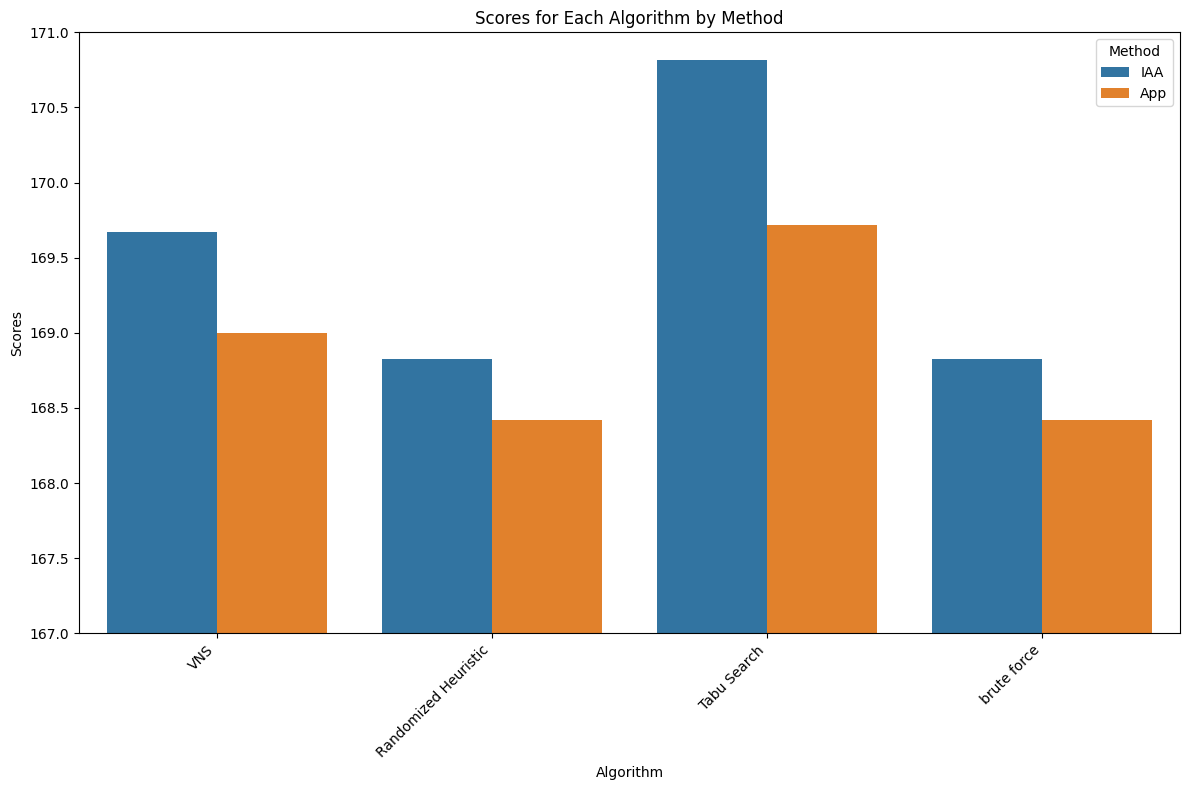

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_exploded.copy()

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Algorithm', y='Score', hue='Method', data=df, ci=None)
plt.title('Scores for Each Algorithm by Method')
plt.xlabel('Algorithm')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Method')

# Set the lower limit of the y-axis
plt.ylim(167, 171)

plt.tight_layout()
plt.show()


In [84]:
df

,Algorithm,Method,Athletes,Score
0,VNS,IAA,jordan chiles,169.671750
0,VNS,IAA,shilese jones,169.671750
0,VNS,IAA,simone biles,169.671750
0,VNS,IAA,ashlee sullivan,169.671750
1,VNS,App,shilese jones,168.998125
1,VNS,App,jordan chiles,168.998125
1,VNS,App,simone biles,168.998125
1,VNS,App,joscelyn roberson,168.998125
2,Randomized Heuristic,IAA,jordan chiles,168.829000
2,Randomized Heuristic,IAA,simone biles,168.829000


In [92]:
counts = pd.read_csv('Competition/top_countries.csv')

In [94]:
counts = counts.drop(columns=['Algorithm', 'Athletes'])

In [95]:
counts

,Country,Score
0,Great Britain,167.763
1,France,164.763
2,China,166.965
3,Canada,159.562
4,Brazil,164.995


In [102]:
df=df.drop(columns=['Athletes'])

In [103]:
df

,Algorithm,Method,Score
0,VNS,IAA,169.671750
1,VNS,App,168.998125
2,Hyper-Heuristics,IAA,168.829000
3,Hyper-Heuristics,App,168.422350
4,Tabu Search,IAA,170.813000
5,Tabu Search,App,169.719089
6,brute force,IAA,168.829000
7,brute force,App,168.422350


In [104]:
df=df.sort_values(by='Score', ascending=False)

In [105]:
df

,Algorithm,Method,Score
4,Tabu Search,IAA,170.813000
5,Tabu Search,App,169.719089
0,VNS,IAA,169.671750
1,VNS,App,168.998125
2,Hyper-Heuristics,IAA,168.829000
6,brute force,IAA,168.829000
3,Hyper-Heuristics,App,168.422350
7,brute force,App,168.422350


In [107]:
counts

,Country,Score
0,Great Britain,167.763
1,France,164.763
2,China,166.965
3,Canada,159.562
4,Brazil,164.995


In [109]:
counts['Country'].unique()

array(['Great Britain', 'France', 'China', 'Canada', 'Brazil'],
      dtype=object)